Construindo um grafo automaticamente
====================================



## Introdução



Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso `grafo computacional`. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor $y$. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o `backpropagation`.



In [1]:
try:
    import graphviz
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install graphviz

## Importações



In [2]:
from funcoes import plota_grafo

## Código e discussão



### Primeiros passos



A base de tudo será uma classe chamada `Valor`. Vamos começar pelo básico!



In [3]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

Vamos testar nossa classe!



In [4]:
x1 = Valor(60)
print(x1)
print(x1.data)

Valor(data=60)
60


### Os dunders `__add__` e `__mul__`



Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe `Valor`.



In [5]:
a = Valor(10)
b = Valor(5)

In [6]:
#print(a + b)

In [7]:
#print(a * b)

Ué&#x2026; porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra `Valor`&#x2026;

Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores `+` e `*`. Quem faz isso são os dunders `__add__` e `__mul__`.



In [8]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        saida = Valor(self.data + outro_valor.data)
        return saida

    def __mul__(self, outro_valor):
        saida = Valor(self.data * outro_valor.data)
        return saida

Vamos testar!



In [9]:
a = Valor(10)
b = Valor(5)

print(a + b)
print(a * b)

Valor(data=15)
Valor(data=50)


### Registrando os progenitores



Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.



In [10]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

Vamos testar!



In [11]:
a = Valor(10)
b = Valor(5)

print(a.data)
print(a.progenitor)

c = a + b
d = c * a

print(c)
print(a)
print(d.progenitor)

10
()
Valor(data=15)
Valor(data=10)
(Valor(data=15), Valor(data=10))


### Registrando o operador mãe



Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.



In [12]:
# Armazenando valor do operador mãe
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [13]:
a = Valor(10)
b = Valor(5)

c = a + b
d = c * a

print(c)
print(c.progenitor)
print(c.operador_mae)

Valor(data=15)
(Valor(data=10), Valor(data=5))
+


### Plotando o primeiro grafo



Vamos plotar nosso primeiro grafo!



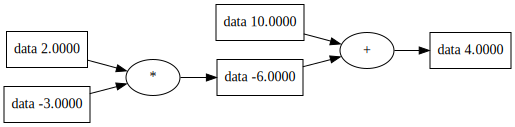

In [14]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

plota_grafo(e)

### Registrando o rótulo



Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.



In [15]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [16]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

d.rotulo = "d"
e.rotulo = "e"

grafo = plota_grafo(e)
print(grafo)

digraph {
	graph [rankdir=LR]
	2693363504128 [label="{ c | data 10.0000 }" shape=record]
	2693363506192 [label="{ b | data -3.0000 }" shape=record]
	2693363433184 [label="{ e | data 4.0000 }" shape=record]
	"2693363433184+" [label="+"]
	"2693363433184+" -> 2693363433184
	2693363432752 [label="{ d | data -6.0000 }" shape=record]
	"2693363432752*" [label="*"]
	"2693363432752*" -> 2693363432752
	2693363505088 [label="{ a | data 2.0000 }" shape=record]
	2693363432752 -> "2693363433184+"
	2693363504128 -> "2693363433184+"
	2693363505088 -> "2693363432752*"
	2693363506192 -> "2693363432752*"
}



### Refazendo o grafo que fizemos na aula anterior



Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!



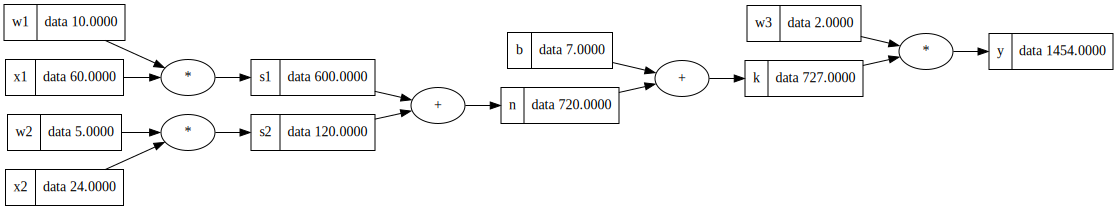

In [17]:
x1 = Valor(60, rotulo="x1")
x2 = Valor(24, rotulo="x2")
w1 = Valor(10, rotulo="w1")
w2 = Valor(5, rotulo="w2")
w3 = Valor(2, rotulo="w3")
b = Valor(7, rotulo="b")

s1 = x1 * w1
s1.rotulo = "s1"

s2 = x2 * w2
s2.rotulo = "s2"

n = s1 + s2
n.rotulo = "n"

k = n + b
k.rotulo = "k"

y = k * w3
y.rotulo = "y"

plota_grafo(y)

## Conclusão



Neste experimento, focamos na representação de grafos, especialmente os vistos na primeira aula de Redes Neurais, onde são representadas as operações e o sentido a ser seguido. Através da implementação desses métodos especiais, podemos criar uma estrutura que permite a composição e conexão de operações matemáticas de maneira intuitiva. Cada objeto da classe pode representar um nó em um grafo, e ao realizar a operação desejada, os nós progenitores são armazenados, juntamente com a operação mãe e o rótulo correspondente.

Para executar operações com os valores definidos nas classes, foi necessário definir internamente as operações por meio dos métodos "dunders" delimitados por dois sublinhados, como __add__ para a adição. Essa construção é fundamental, uma vez que precisaremos calcular o backpropagation do código.

Plotando o grafo, utilizando o módulo Graphviz do Python, conseguimos representar graficamente o grafo da primeira aula de Redes Neurais, com exceção da representação do gradiente.

Essas técnicas nos permitiram visualizar e compreender melhor a estrutura e o fluxo de informações dentro de redes neurais, facilitando o estudo e a implementação de algoritmos de aprendizado de máquina mais avançados.

## Playground

